# Predicting Wine Quality using Wine Quality Dataset
It’s a well-established fact that age makes wine better – the older the wine, the better it will taste. However, age is not the only thing that determines a wine’s taste. Numerous factors determine the wine quality certification, including physicochemical tests such as alcohol quantity, fixed acidity, volatile acidity, density, and pH level, to name a few. In this ML project, you need to develop an ML model that can explore a wine’s chemical properties to predict its quality. The wine quality dataset you’ll be using for this project consists of approximately 4898 observations, including 11 independent variables and one dependent variable. Mentioning Machine Learning projects for the final year can help your resume look much more interesting than others.

### The requirements for the project are
Explain feature engineering Trying cross validation and Hyperparameters tuning will be a plus. Try at least 2 models and prepare the report with the performance comparison and reasoning why one is better than another.

### Our goals for this notebook:
<b>Part 1:</b> <i>Exploratory Data Analysis</i>

<i>Exploratory Data Analysis: understand the data by EDA and derive simple models with Pandas as baseline</i>

<b>Part 2:</b> <i>Data wrangling and feature engineering</i>

<i>Data wrangling: fill nan, convert categorical to numerical, create train and test data for ML algorithms</i>

<b>Part 3:</b> <i>Trying cross validation and Hyperparameters</i>

<b>Part 4:</b> <i>Comparison of Model results use metrics like confusion_matrix, classification_report, accuracy_score and implement k fold cross validation for comparison of test score</i>

## Part 1 and Part 2: Exploratory Data Analysis,  Data wrangling and Feature Engineering

### install modules

### Import modules that will be used in process

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

import plotly.express as px

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

### Import data set (csv)

### Show 5 random choosen rows OR first 5 rows from data set

In [2]:
df = pd.read_csv("winequalityN.csv")
df.sample(5)                   #shows 5 random choosen rows
#df.head(5)                    #shows first 5 rows from data set

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
1805  white            7.5              0.33         0.39            12.4   
718   white            6.2              0.21         0.27             1.7   
5505    red            8.8              0.48         0.41             3.3   
259   white            5.8              0.36         0.38             0.9   
5803    red            9.2              0.58         0.20             3.0   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
1805      0.065                 29.0                 119.0   0.9974  3.16   
718       0.038                 41.0                 150.0   0.9933  3.49   
5505      0.092                 26.0                  52.0   0.9982  3.31   
259       0.037                  3.0                  75.0   0.9904  3.28   
5803      0.081                 15.0                 115.0   0.9980  3.23   

      sulphates  alcohol  quality  
1805       0.39      9.4        5  
718        0.71     10.5        7  
5505       0.53     10.5        6  
259        0.34     11.4        4  
5803       0.59      9.5        5

### Description for data set (Count of rows, mean, std, min, 25%, 50%, 75%, max for each coloumn)

In [3]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


###   Check if there are null elements in the data set

In [5]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In dataset some values for <b>fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, pH, sulphates</b> are missing. Solve this problem by filling null values with mean values.
### Fill Nan values by mean

In [6]:
df.fillna(df.mean(axis=0), inplace=True)
df.head(5)
# instead of
# df['fixed acidity'].fillna(df['fixed acidity'].mean(), inplace=True)
# df['volatile acidity'].fillna(df['volatile acidity'].mean(), inplace=True)
# df['citric acid'].fillna(df['citric acid'].mean(), inplace=True)
# df['residual sugar'].fillna(df['residual sugar'].mean(), inplace=True)
# df['chlorides'].fillna(df['chlorides'].mean(), inplace=True)
# df['pH'].fillna(df['pH'].mean(), inplace=True)
# df['sulphates'].fillna(df['sulphates'].mean(), inplace=True)
# df.head(5)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

### Check Nan elements again

In [7]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Visualizing the Data


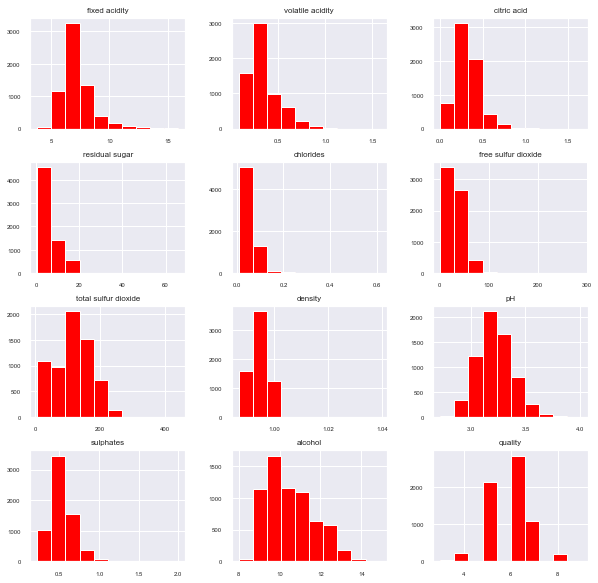

In [8]:
sns.set()
fig = df.hist(figsize=(10,10), color='red', xlabelsize=6, ylabelsize=6)
[x.title.set_size(8) for x in fig.ravel()]
plt.show()

### Find outliers

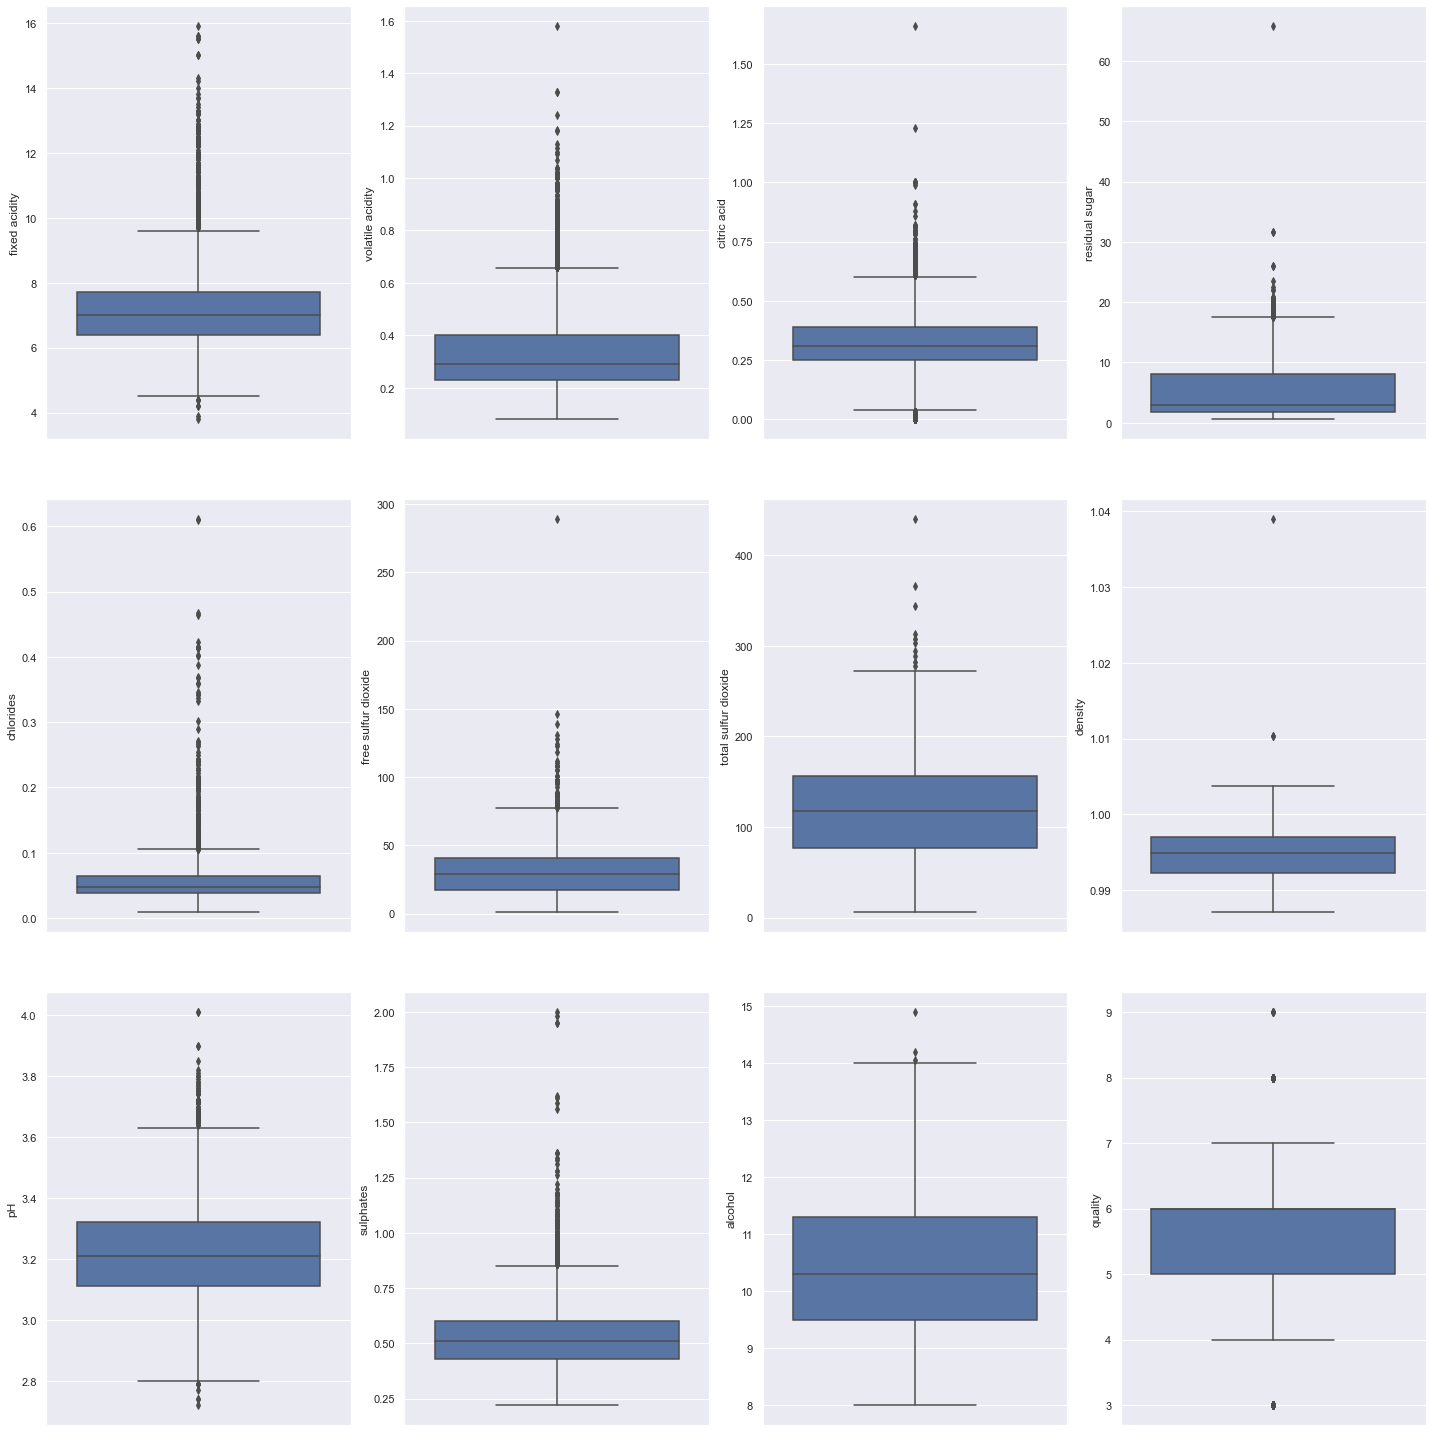

In [9]:
fig,ax = plt.subplots(ncols = 4, nrows = 3, figsize = (20, 20))
index = 0
ax = ax.flatten()
for column, value in df.items():
    if column != 'type':
        sns.boxplot(y = column, data = df, ax = ax[index])
        index += 1
plt.tight_layout(pad = 0.9, w_pad = 0.7, h_pad = 5.0)

### Check correlation between each feature and quality

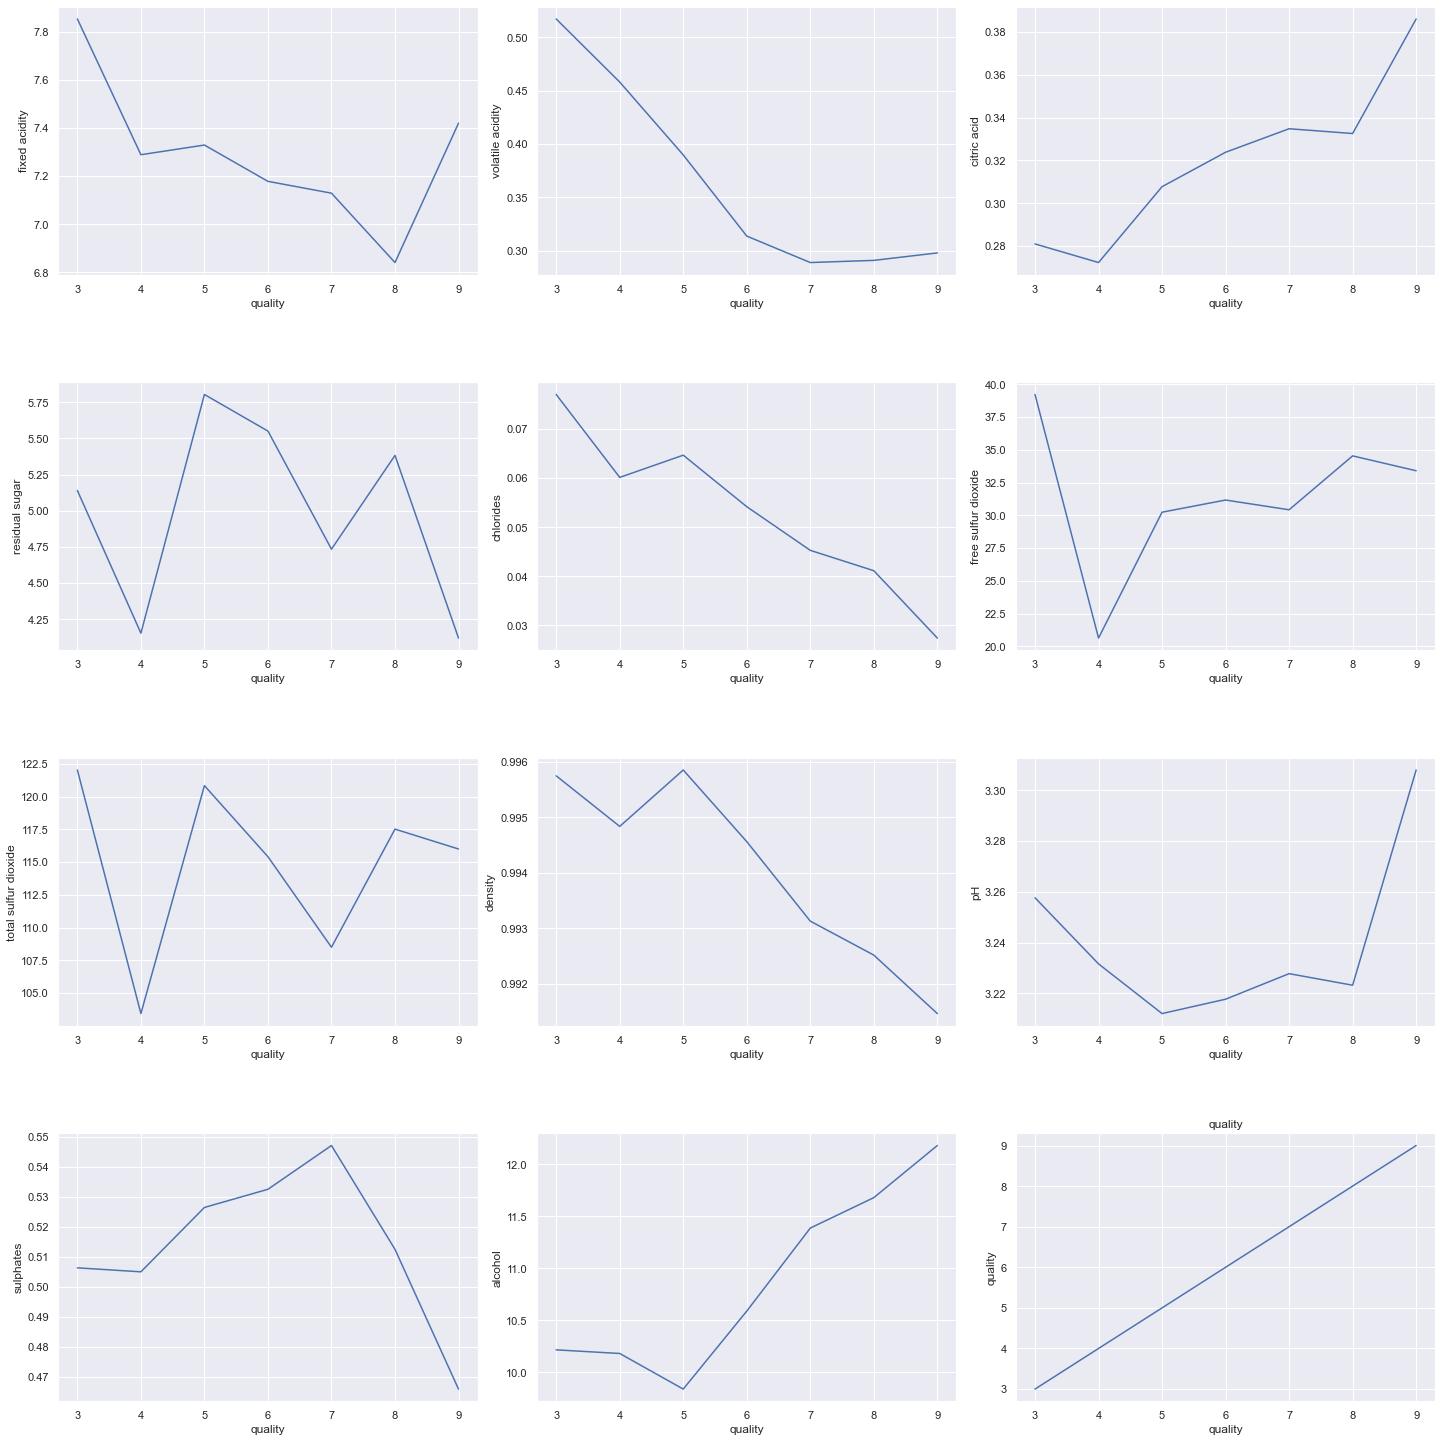

In [10]:
fig,ax = plt.subplots(ncols = 3, nrows = 4, figsize = (20, 20))
index = 0
ax = ax.flatten()
for column, value in df.items():
    if column != 'type':
        axx = df.groupby('quality')[column].mean()
        df.groupby('quality')[column].mean().plot.line(ax = ax[index], ylabel=column)
        #ax.set_ylabel(column)
        plt.ylabel(column)
        plt.title(column)
        index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

### Check the correlation matrix to see how different variables are correlated with each other

### First visualization

<AxesSubplot:>

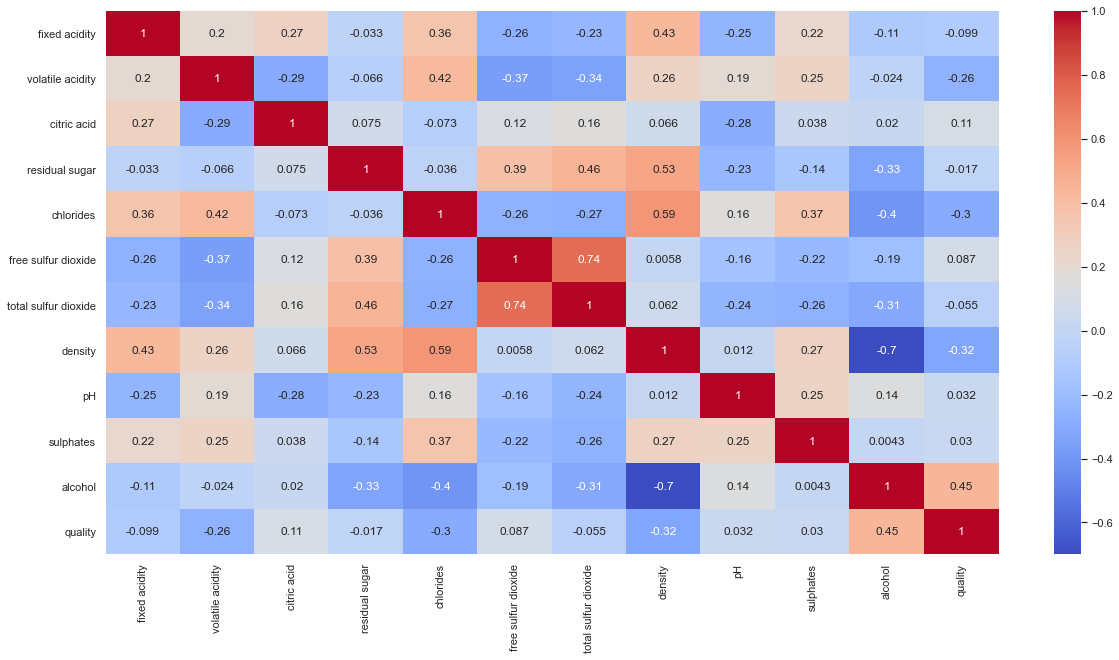

In [11]:
corr = df.corr(method='spearman')
plt.figure(figsize = (20, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

### Second visualization

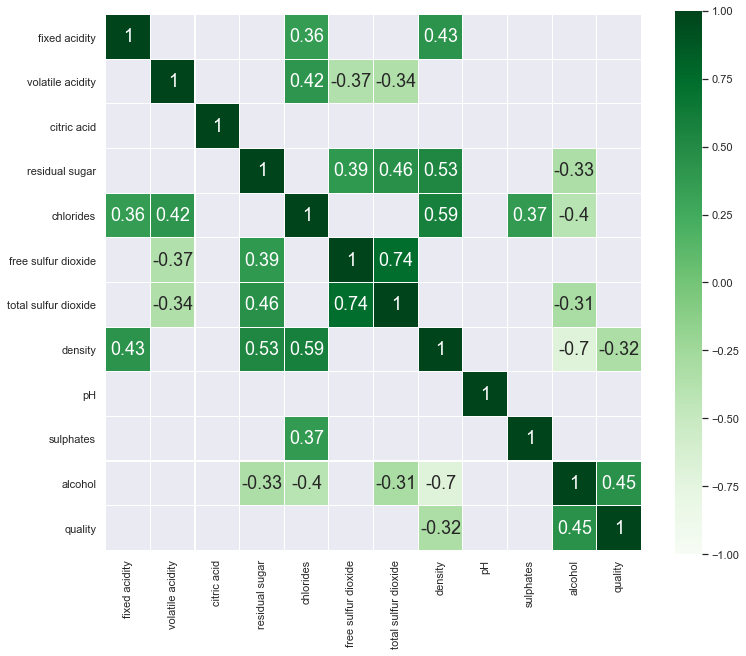

In [12]:
corr = df.corr(method='spearman')
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], 
            cmap='Greens', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 18}, square=True);

### Check the unique values of quality variable

In [13]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

<AxesSubplot:xlabel='quality', ylabel='count'>

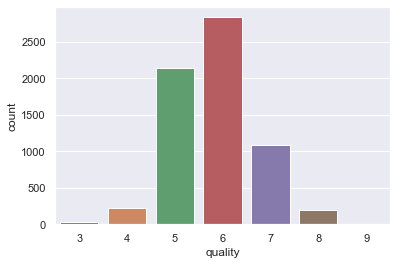

In [14]:
sns.countplot(x='quality', data=df)

### The correlation between quality and wine types

In [15]:
df.groupby(['quality', 'type'])['quality'].count()

quality  type 
3        red        10
         white      20
4        red        53
         white     163
5        red       681
         white    1457
6        red       638
         white    2198
7        red       199
         white     880
8        red        18
         white     175
9        white       5
Name: quality, dtype: int64

### share of white wines is 75%.

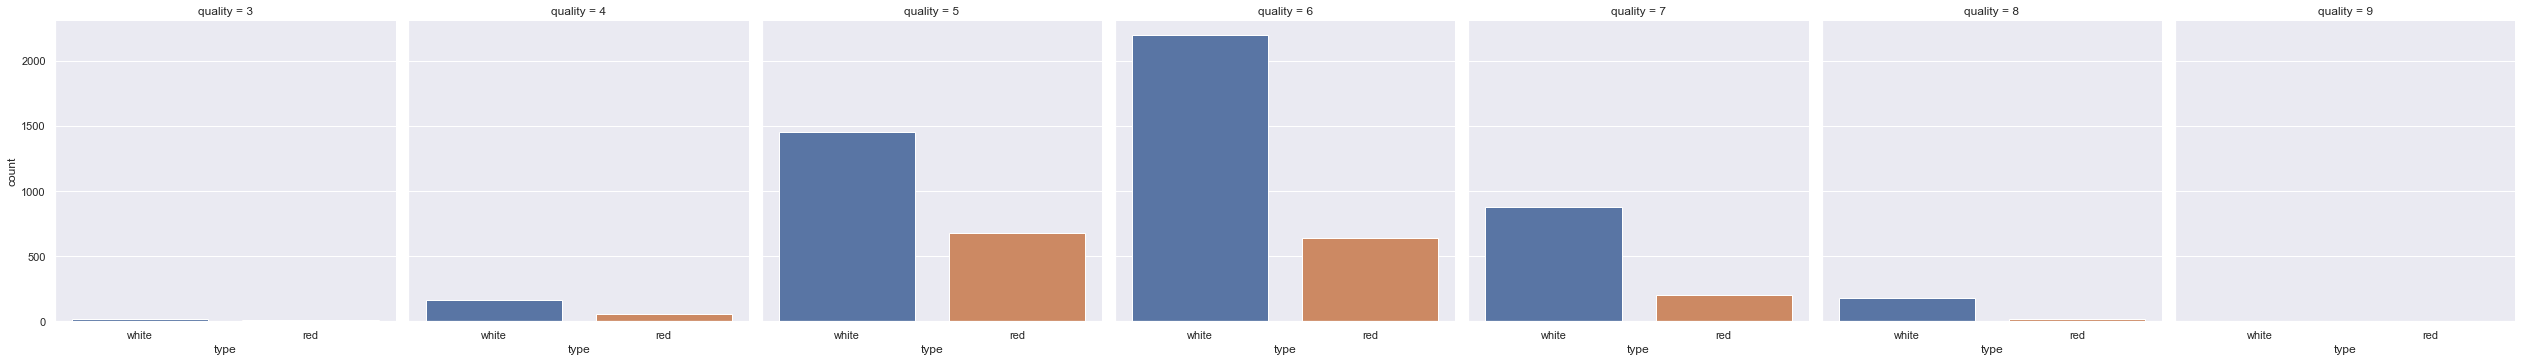

In [16]:
#plt.rcParams['figure.figsize'] = (25, 25)
sns.catplot(x='type', col='quality', kind='count', data=df);
# share of white wine types is quite higher than red wine types

In [17]:
pd.crosstab(df.type, df.quality, margins=True).style.background_gradient(cmap='autumn_r')

In [18]:
m_white = df[df['type']=='white']['quality'].mean() 
# the same result: df.loc[(df['type']=='white'), 'quality'].mean() 
m_red = df[df['type']=='red']['quality'].mean()
print(f"Mean of white wine type's quality is: {m_white}")
print(f"Mean of red wine type's quality is: {m_red}")

Mean of white wine type's quality is: 5.87790935075541
Mean of red wine type's quality is: 5.6360225140712945


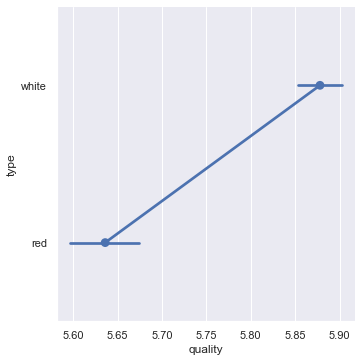

In [19]:
sns.catplot('quality', 'type', kind='point', data=df);

### It seems quality of white wines is higher than red

### Check relations between fixed acidity and quality

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

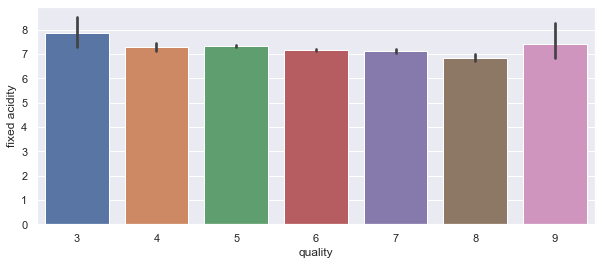

In [20]:
plt.figure(figsize=(10,4))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

there is no clear correelation trend between fixed acidity and quality

### Check relations between volatile acidity and quality

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

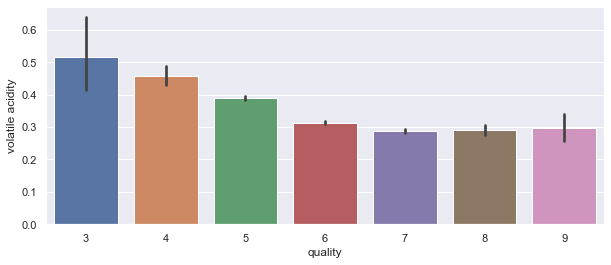

In [21]:
plt.figure(figsize=(10,4))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

here we can see that the higher gets the quality the lower becomes volatile acidity, so there is a negative correlation between these variables

### Check relations between citric acid and quality

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

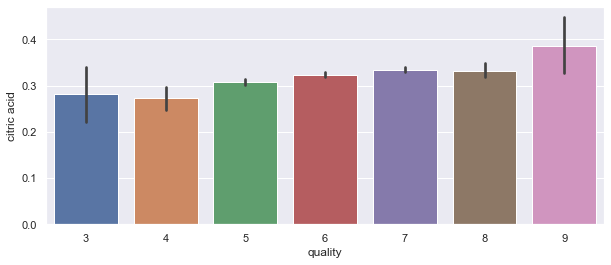

In [22]:
plt.figure(figsize=(10, 4))
sns.barplot(x="quality", y="citric acid",   data=df )

In case of citric acidity we can see the opposity: it is positively correlated with the quality

### Check relations between residual sugar and quality

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

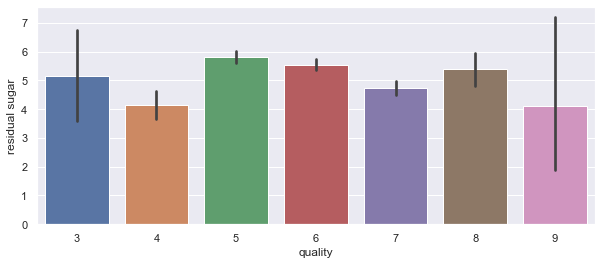

In [23]:
plt.figure(figsize=(10, 4))
sns.barplot(x="quality", y="residual sugar",   data=df )

the relationship between quality and residual sugar is unclear

### Check relation between chlorides and quality

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

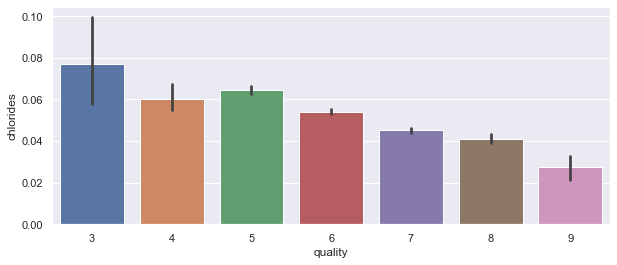

In [24]:
plt.figure(figsize=(10, 4))
sns.barplot(x="quality", y="chlorides",   data=df )

the quality of wine increases as chlorides go down

### Check relation between free sulfur dioxide and quality

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

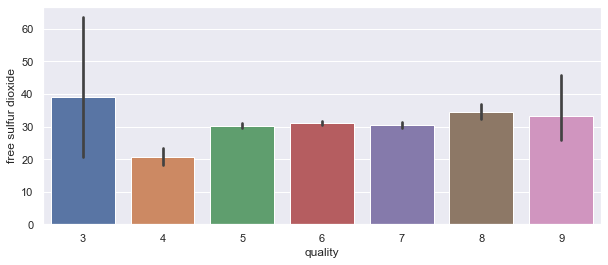

In [25]:
plt.figure(figsize=(10,4))
sns.barplot(x="quality", y="free sulfur dioxide",   data=df )

doesn't provide any insight

### Check relation between total sulfur dioxide and quality

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

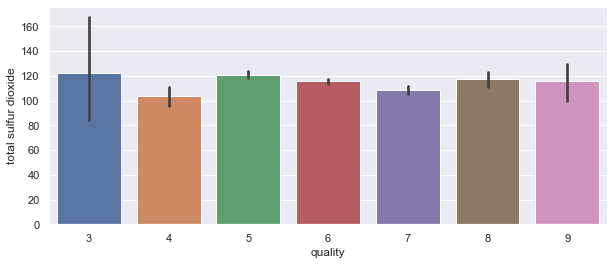

In [26]:
plt.figure(figsize=(10,4))
sns.barplot(x="quality", y="total sulfur dioxide",   data=df )

doesn't provide any insight

### Check relation between density and quality

<AxesSubplot:xlabel='quality', ylabel='density'>

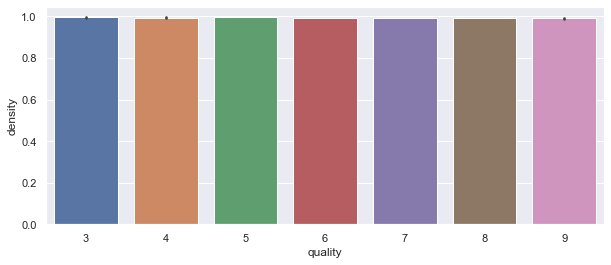

In [27]:
plt.figure(figsize=(10,4))
sns.barplot(x="quality", y="density",   data=df )

not useful

<AxesSubplot:xlabel='quality', ylabel='density'>

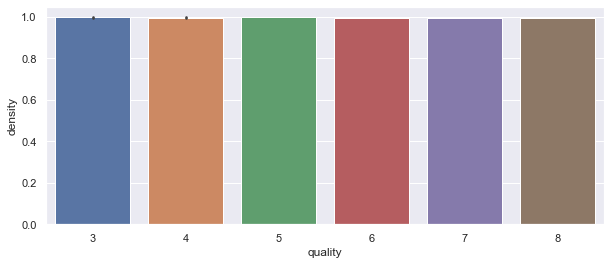

In [28]:
plt.figure(figsize=(10,4))
sns.barplot(x=df[df["type"]=="red"]["quality"], y=df[df["type"]=="red"]["density"],   data=df )

### Check relation between pH and quality

<AxesSubplot:xlabel='quality', ylabel='pH'>

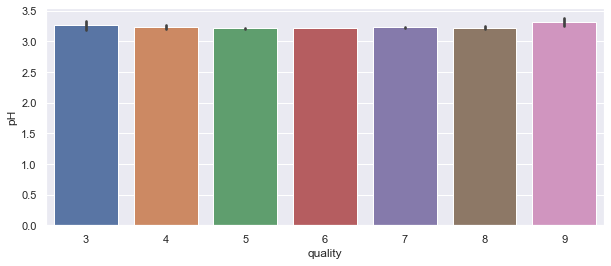

In [29]:
plt.figure(figsize=(10,4))
sns.barplot(x="quality", y="pH",   data=df )

It seems not useful, <b>but</b>

Text(0, 0.5, 'pH')

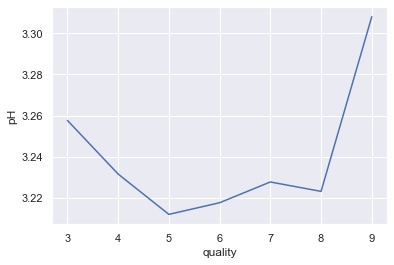

In [30]:
df.groupby('quality')['pH'].mean().plot.line()
plt.ylabel("pH")

But from this vizualization we can see that pH and quality are related.

It is also described in the domain knoledge.

### Check relation between sulphates and quality

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

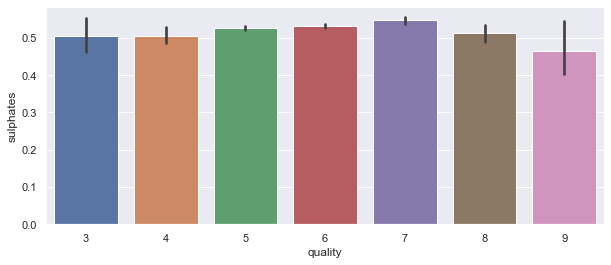

In [31]:
plt.figure(figsize=(10,4))
sns.barplot(x="quality", y="sulphates",   data=df )

The relationship with sulphates is strange, it increases as wine's quality gets higher (from 3 to 7), however, in case if quality values 8,9 it's lower

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

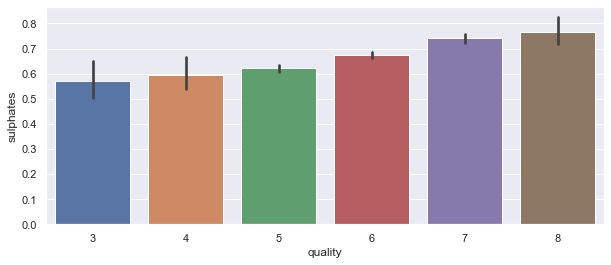

In [32]:
plt.figure(figsize=(10,4))
sns.barplot(x=df[df["type"]=="red"]["quality"], y=df[df["type"]=="red"]["sulphates"],   data=df )

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

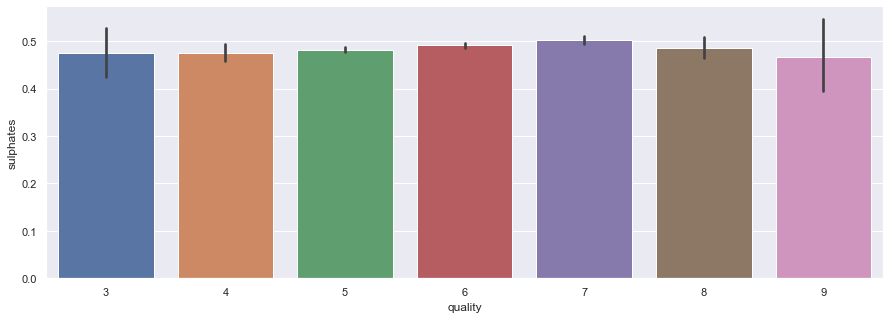

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(x=df[df["type"]=="white"]["quality"], y=df[df["type"]=="white"]["sulphates"],   data=df )

we can see differences between the correlations of red and white wines, probably it makes sense separating them for modeling

Text(0, 0.5, 'sulphates')

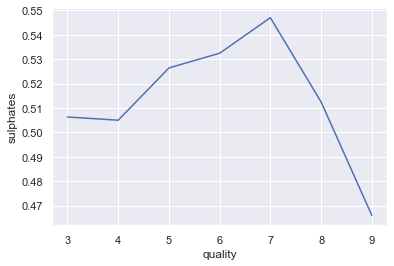

In [34]:
df.groupby('quality')['sulphates'].mean().plot.line()
plt.ylabel("sulphates")

### Check relationship between quality and alcohol

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

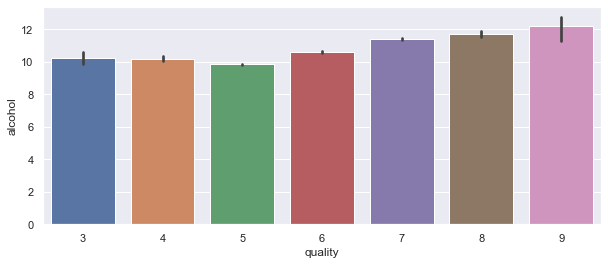

In [35]:
fig = plt.figure(figsize = (10,4))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

In case of alcohol we see a positive correlation

### Check realtion between fixed acidity and pH

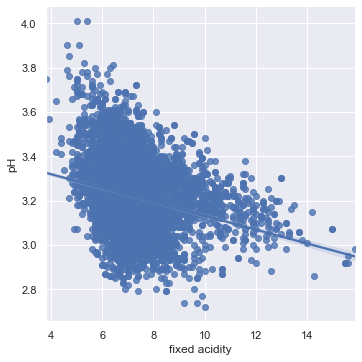

In [36]:
sns.lmplot(x="fixed acidity", y="pH", data=df)

### Check realtion between fixed acidity and citric acid

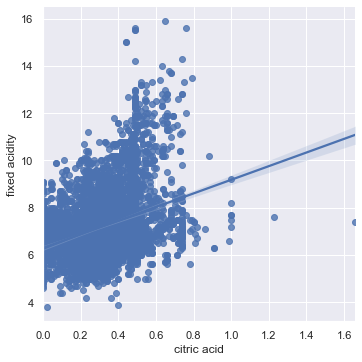

In [37]:
sns.lmplot(y="fixed acidity", x="citric acid", data=df)

### Domain knowledge
#### pH depends on acidity(fixed acidity, volatile acidity and cirtic acid)
#### And the best values of pH for wine quality are (3.2 - 3.4)
In addition, it is known from chemistry that how much higher the acidity as much lower the pH and vice versa.
It's also clear from 2 visualizations below.

Text(0, 0.5, 'fixed acidity')

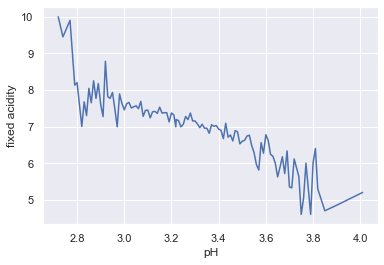

In [38]:
df.groupby('pH')['fixed acidity'].mean().plot.line()
plt.ylabel("fixed acidity")

Text(0, 0.5, 'citric acid')

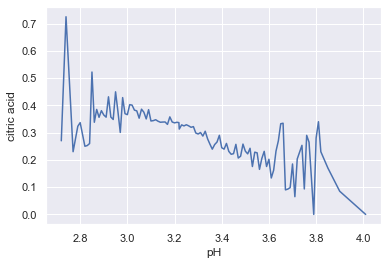

In [39]:
df.groupby('pH')['citric acid'].mean().plot.line()
plt.ylabel("citric acid")

Text(0, 0.5, 'volatile acidity')

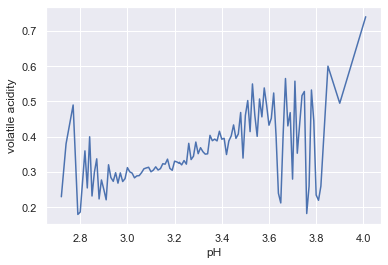

In [40]:
df.groupby('pH')['volatile acidity'].mean().plot.line()
plt.ylabel("volatile acidity")

So we can group these three values and use one(total acidity) instead of them

### Combining fixed acidity, volatile acidity and citric acid into one variable total_acidity

Text(0, 0.5, 'total_acidity')

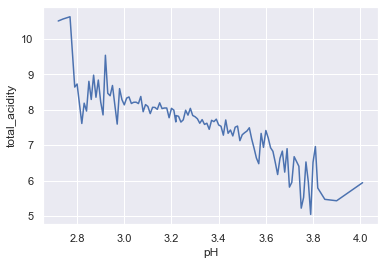

In [41]:
df["total_acidity"]= df['fixed acidity']+df['volatile acidity']+df['citric acid']
df.groupby('pH')['total_acidity'].mean().plot.line()
plt.ylabel("total_acidity")

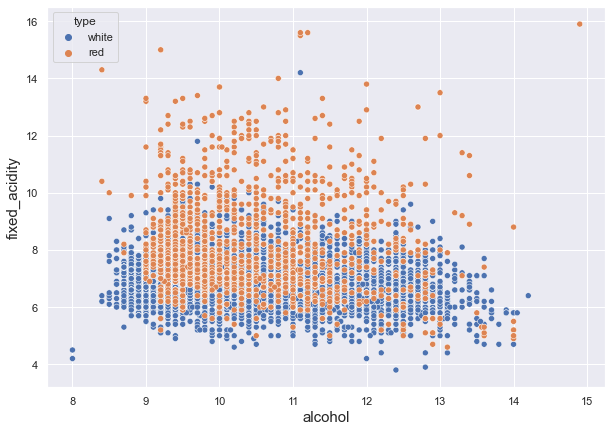

In [42]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="alcohol",y="fixed acidity",data=df, hue='type',marker= 'o',c="m")
plt.xlabel("alcohol",fontsize=15)
plt.ylabel("fixed_acidity",fontsize=15)
plt.show()

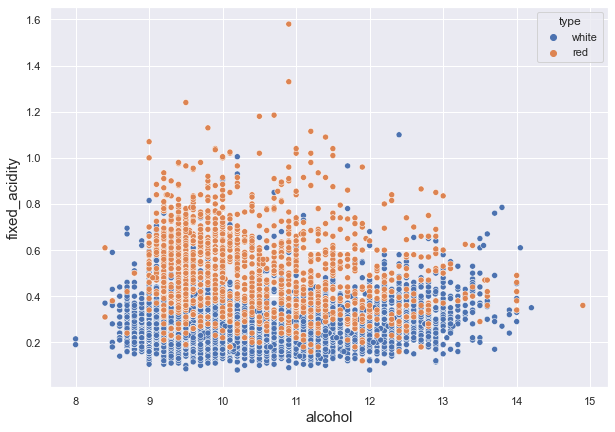

In [43]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="alcohol",y="volatile acidity",data=df, hue='type',marker= 'o',c="m")
plt.xlabel("alcohol",fontsize=15)
plt.ylabel("fixed_acidity",fontsize=15)
plt.show()

### From all this analyze we can see that there are some outliers. So we have 2 variants

<i>1. Remove this outliers.</i>

<i>2. Replace them with max/min values, so they may contain good values for other features and this variant will save their values</i>

### 1. Remove this outliers.

In [44]:
lower_limit = df["free sulfur dioxide"].mean() - 3*df["free sulfur dioxide"].std()
upper_limit = df["free sulfur dioxide"].mean() + 3*df["free sulfur dioxide"].std()
print(lower_limit,upper_limit)
df2 = df[(df["free sulfur dioxide"] > lower_limit) & (df["free sulfur dioxide"] < upper_limit)]
df.shape[0] - df2.shape[0]

-22.722879937833156 83.77351869418224


36

In [45]:
lower_limit = df2['total sulfur dioxide'].mean() - 3*df2['total sulfur dioxide'].std()
upper_limit = df2['total sulfur dioxide'].mean() + 3*df2['total sulfur dioxide'].std()
print(lower_limit,upper_limit)
df3 = df2[(df2['total sulfur dioxide'] > lower_limit) & (df2['total sulfur dioxide'] < upper_limit)]
df3.sample(5)

-53.15243132839596 283.65436601342924


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
779   white            8.1              0.17         0.44            14.1   
4193  white            8.1              0.27         0.33             1.3   
5328    red           10.5              0.24         0.47             2.1   
4797  white            5.7              0.33         0.32             1.4   
176   white            7.2              0.32         0.47             5.1   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
779       0.053                 43.0                 145.0  1.00060  3.28   
4193      0.045                 26.0                 100.0  0.99066  2.98   
5328      0.066                  6.0                  24.0  0.99780  3.15   
4797      0.043                 28.0                  93.0  0.98970  3.31   
176       0.044                 19.0                  65.0  0.99100  3.03   

      sulphates  alcohol  quality  total_acidity  
779        0.75      8.8        8           8.71  
4193       0.44     12.4        6           8.70  
5328       0.90     11.0        7          11.21  
4797       0.50     12.3        6           6.35  
176        0.41     12.6        4           7.99

In [46]:
df2.shape[0] - df3.shape[0]

5

In [47]:
lower_limit = df3['residual sugar'].mean() - 3*df3['residual sugar'].std()
upper_limit = df3['residual sugar'].mean() + 3*df3['residual sugar'].std()
print(lower_limit,upper_limit)
df4 = df3[(df3['residual sugar'] > lower_limit) & (df3['residual sugar'] < upper_limit)]
df4.sample(5)

-8.835863630876144 19.712440041288158


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
6044    red            7.8              0.50         0.12             1.8   
5571    red            8.2              0.73         0.21             1.7   
5444    red            7.5              0.55         0.24             2.0   
1711  white            7.0              0.20         0.30             6.1   
5528    red            8.7              0.54         0.26             2.5   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
6044      0.178                  6.0                  21.0   0.9960  3.28   
5571      0.074                  5.0                  13.0   0.9968  3.20   
5444      0.078                 10.0                  28.0   0.9983  3.45   
1711      0.037                 31.0                 120.0   0.9939  3.24   
5528      0.097                  7.0                  31.0   0.9976  3.27   

      sulphates  alcohol  quality  total_acidity  
6044       0.87      9.8        6           8.42  
5571       0.52      9.5        5           9.14  
5444       0.78      9.5        6           8.29  
1711       0.51     10.8        5           7.50  
5528       0.60      9.3        6           9.50

In [48]:
df3.shape[0] - df4.shape[0]

26

In [49]:
df4.sample(5)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
5774    red            7.1             0.470         0.00            2.20   
3308  white            6.4             0.350         0.28           12.60   
1127  white            6.4             0.125         0.29            5.85   
30    white            8.5             0.240         0.39           10.40   
4420  white            6.6             0.220         0.23           17.30   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
5774      0.067                  7.0                  14.0  0.99517  3.40   
3308      0.039                 19.0                 124.0  0.99539  3.20   
1127      0.042                 24.0                  99.0  0.99200  3.23   
30        0.044                 20.0                 142.0  0.99740  3.20   
4420      0.047                 37.0                 118.0  0.99906  3.08   

      sulphates  alcohol  quality  total_acidity  
5774       0.58     10.9        4          7.570  
3308       0.43     10.6        6          7.030  
1127       0.32     12.0        7          6.815  
30         0.53     10.0        6          9.130  
4420       0.46      8.8        6          7.050

So our first dataframe is <b>df4</b>

### 2. Replace them with max/min values, so they may contain good values for other features and this variant will save their values

In [50]:
lower_limit = df["free sulfur dioxide"].mean() - 3*df["free sulfur dioxide"].std()
upper_limit = df["free sulfur dioxide"].mean() + 3*df["free sulfur dioxide"].std()
print(lower_limit,upper_limit)
df2_repl = df


def replace_outliers(arr):
    arr = np.array(arr)
    upper = arr.mean() + 3 * arr.std()
    lower = arr.mean() - 3 * arr.std()
    arr[(arr > upper)] = upper
    arr[(arr < lower)] = lower
    return arr


df2_repl["free sulfur dioxide"] = replace_outliers(df2_repl["free sulfur dioxide"])
df2_repl["total sulfur dioxide"] = replace_outliers(df2_repl["total sulfur dioxide"])
df2_repl["residual sugar"] = replace_outliers(df2_repl["residual sugar"])

lower_limit = df2_repl["free sulfur dioxide"].mean() - 3*df2_repl["free sulfur dioxide"].std()
upper_limit = df2_repl["free sulfur dioxide"].mean() + 3*df2_repl["free sulfur dioxide"].std()
print(lower_limit,upper_limit)

-22.722879937833156 83.77351869418224
-20.77329949410528 81.55479838364607


In [51]:
df2_repl.head(5)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36       19.715405   
1  white            6.3              0.30         0.34        1.600000   
2  white            8.1              0.28         0.40        6.900000   
3  white            7.2              0.23         0.32        8.500000   
4  white            7.2              0.23         0.32        8.500000   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  total_acidity  
0       0.45      8.8        6           7.63  
1       0.49      9.5        6           6.94  
2       0.44     10.1        6           8.78  
3       0.40      9.9        6           7.75  
4       0.40      9.9        6           7.75

our second dataframe is <b>df2_repl</b>

### Count by quality

In [52]:
df4.quality.value_counts()

6    2806
5    2116
7    1075
4     214
8     189
3      25
9       5
Name: quality, dtype: int64

In [53]:
# Copy datasets for 2nd way testing
df4_v2 = df4.copy()
df2_repl_v2 = df2_repl.copy()

In [54]:
df2_repl_v2.head(5)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36       19.715405   
1  white            6.3              0.30         0.34        1.600000   
2  white            8.1              0.28         0.40        6.900000   
3  white            7.2              0.23         0.32        8.500000   
4  white            7.2              0.23         0.32        8.500000   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  total_acidity  
0       0.45      8.8        6           7.63  
1       0.49      9.5        6           6.94  
2       0.44     10.1        6           8.78  
3       0.40      9.9        6           7.75  
4       0.40      9.9        6           7.75

our third dataframe is <b>df4_v2</b>

### 1. Let's combine our target variable into two classes: low quality (3-6) and high quality (7-9)

### 1.1 for df4 (Outliers removed)

In [55]:
quaity_mapping = { 3 : 0, 4 : 0, 5: 0, 6 : 0, 7: 1, 8 : 1, 9 : 1}
df4["quality"] =  df4["quality"].map(quaity_mapping)

<AxesSubplot:xlabel='quality', ylabel='count'>

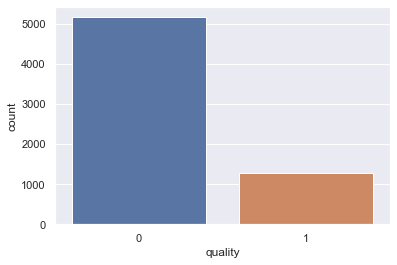

In [56]:
sns.countplot(df4['quality'])

We notice that there are fewer high quality wines in our database. And it will negatively affect the prediction. In the next steps we can increase the database by adding good quality wines. But that is in the <b>next steps</b>. Let's ignore that fact at this stage of the project.

In [57]:
df4.sample(5)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
353   white            7.3              0.33         0.40            6.85   
1111  white            8.0              0.18         0.37            1.30   
4392  white            6.2              0.25         0.44           15.80   
5654    red            6.3              0.98         0.01            2.00   
3939  white            6.2              0.27         0.32            6.30   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
353       0.038                 32.0                 138.0  0.99200  3.03   
1111      0.040                 15.0                  96.0  0.99120  3.06   
4392      0.057                 39.0                 167.0  0.99804  3.14   
5654      0.057                 15.0                  33.0  0.99488  3.60   
3939      0.048                 47.0                 159.0  0.99282  3.21   

      sulphates  alcohol  quality  total_acidity  
353        0.30     11.9        1           8.03  
1111       0.61     12.1        0           8.55  
4392       0.51      9.2        0           6.89  
5654       0.46     11.2        0           7.29  
3939       0.60     11.0        0           6.79

For the <b>next steps</b> we also can combine our target variable into three classes: Low, Medium and High

quality_mapping = {3: "Low", 4: "Low", 5: "Medium", 6: "Medium", 7:"Medium", 8: "High", 9: "High"}

df4['quality'] = df4['quality'].map(quality_mapping)

quality_mapping = {"Low": 0, "Medium": 1, "High": 2}

df4['quality'] = df4['quality'].map(quality_mapping)

df4.quality.value_counts()

<b>In addition, we see from this whole analysis that red and white wines have different characteristics, and wine characterization parameters affect the quality of the wine differently depending on its color. Therefore, in our opinion, it is not very sensible to run the models on the basis of simultaneous white and red wines.</b>

So we will get prediction only for red wine to show how it works. But please note that the same can be done for white wine by changing the settings accordingly.

### 1.2 for df2_repl (Outliers replaced with mean values)

In [58]:
quaity_mapping = { 3 : 0, 4 : 0, 5: 0, 6 : 0, 7: 1, 8 : 1, 9 : 1}
df2_repl["quality"] =  df2_repl["quality"].map(quaity_mapping)

<AxesSubplot:xlabel='quality', ylabel='count'>

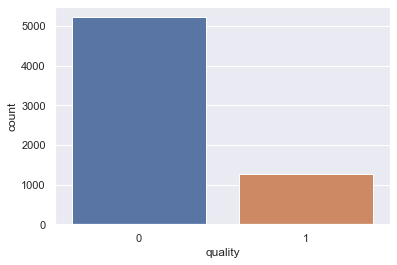

In [59]:
sns.countplot(df2_repl['quality'])

In [60]:
df2_repl.head(5)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36       19.715405   
1  white            6.3              0.30         0.34        1.600000   
2  white            8.1              0.28         0.40        6.900000   
3  white            7.2              0.23         0.32        8.500000   
4  white            7.2              0.23         0.32        8.500000   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  total_acidity  
0       0.45      8.8        0           7.63  
1       0.49      9.5        0           6.94  
2       0.44     10.1        0           8.78  
3       0.40      9.9        0           7.75  
4       0.40      9.9        0           7.75

In [61]:
df2_repl.quality.value_counts()

0    5220
1    1277
Name: quality, dtype: int64

### 2. Combine our target variable into three classes: low quality (3, 4) , medium quality (5, 6, 7) and high quality (8,9)

### 2.1 for df4 (Outliers removed)

In [62]:
quality_mapping2 = {3: "Low", 4: "Low", 5: "Medium", 6: "Medium", 7:"Medium", 8: "High", 9: "High"}
df4_v2['quality'] = df4_v2['quality'].map(quality_mapping2)
df4_v2.quality.value_counts()

Medium    5997
Low        239
High       194
Name: quality, dtype: int64

In [63]:
quality_mapping = {"Low": 0, "Medium": 1, "High": 2}
df4_v2['quality'] = df4_v2['quality'].map(quality_mapping)
df4_v2.quality.value_counts()

1    5997
0     239
2     194
Name: quality, dtype: int64

In [64]:
df4_v2.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   
5  white            8.1              0.28         0.40             6.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   
5      0.050                 30.0                  97.0   0.9951  3.26   

   sulphates  alcohol  quality  total_acidity  
1       0.49      9.5        1           6.94  
2       0.44     10.1        1           8.78  
3       0.40      9.9        1           7.75  
4       0.40      9.9        1           7.75  
5       0.44     10.1        1           8.78

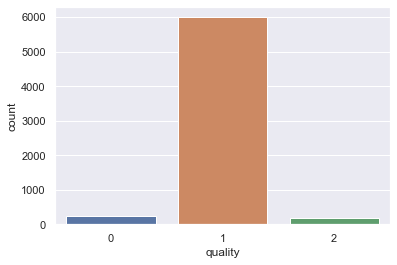

In [65]:
sns.countplot(df4_v2['quality']);

### 2.2 for df2_repl (Outliers replaced with mean values)

In [66]:
quality_mapping2 = {3: "Low", 4: "Low", 5: "Medium", 6: "Medium", 7:"Medium", 8: "High", 9: "High"}
df2_repl_v2['quality'] = df2_repl_v2['quality'].map(quality_mapping2)
df2_repl_v2.quality.value_counts()

Medium    6053
Low        246
High       198
Name: quality, dtype: int64

In [67]:
quality_mapping = {"Low": 0, "Medium": 1, "High": 2}
df2_repl_v2['quality'] = df2_repl_v2['quality'].map(quality_mapping)
df2_repl_v2.quality.value_counts()

1    6053
0     246
2     198
Name: quality, dtype: int64

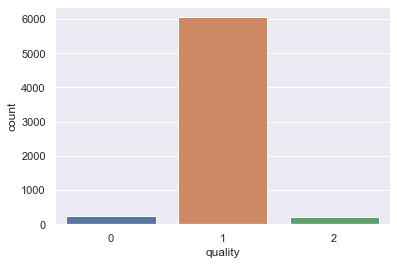

In [68]:
sns.countplot(df2_repl_v2['quality']);

In [69]:
df2_repl_v2.head(5)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36       19.715405   
1  white            6.3              0.30         0.34        1.600000   
2  white            8.1              0.28         0.40        6.900000   
3  white            7.2              0.23         0.32        8.500000   
4  white            7.2              0.23         0.32        8.500000   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  total_acidity  
0       0.45      8.8        1           7.63  
1       0.49      9.5        1           6.94  
2       0.44     10.1        1           8.78  
3       0.40      9.9        1           7.75  
4       0.40      9.9        1           7.75

In [70]:
df2_repl_v2.quality.value_counts()

1    6053
0     246
2     198
Name: quality, dtype: int64

our forth dataframe is <b>df2_repl_v2</b>

## Now we have 4 datasets for modeling
#### 1.1) df4 (where outliers removed, quality scaled to 2 types)
#### 1.2) df2_repl (where outliers replaced with mean values, quality scaled to 2 types)
#### 2.1) df4_v2 (where outliers removed with mean values, quality scaled to 3 types)
#### 2.2) df2_repl_v2 (where outliers replaced with mean values, quality scaled to 3 types)

In [71]:
df4.sample(5)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
4002  white            6.1              0.25         0.48            15.8   
719   white            7.4              0.29         0.50             1.8   
2248  white            7.4              0.20         0.29             1.7   
5152    red            7.1              0.60         0.00             1.8   
5687    red            8.6              0.63         0.17             2.9   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
4002      0.052                 25.0                  94.0  0.99782  3.07   
719       0.042                 35.0                 127.0  0.99370  3.45   
2248      0.047                 16.0                 100.0  0.99243  3.28   
5152      0.074                 16.0                  34.0  0.99720  3.47   
5687      0.099                 21.0                 119.0  0.99800  3.09   

      sulphates  alcohol  quality  total_acidity  
4002       0.45      9.2        0           6.83  
719        0.50     10.2        1           8.19  
2248       0.45     10.6        0           7.89  
5152       0.70      9.9        0           7.70  
5687       0.52      9.3        0           9.40

In [72]:
df2_repl.sample(5)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
2384  white            6.9              0.15         0.28             4.4   
5861    red            8.8              0.27         0.39             2.0   
5946    red            9.3              0.49         0.36             1.7   
3888  white            6.0              0.28         0.24            17.8   
4342  white            5.7              0.28         0.35             1.2   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
2384      0.029                 14.0                 107.0  0.99347  3.24   
5861      0.100                 20.0                  27.0  0.99546  3.15   
5946      0.081                  3.0                  14.0  0.99702  3.27   
3888      0.047                 42.0                 111.0  0.99896  3.10   
4342      0.052                 39.0                 141.0  0.99108  3.44   

      sulphates  alcohol  quality  total_acidity  
2384       0.46     10.4        1           7.33  
5861       0.69     11.2        0           9.46  
5946       0.78     10.9        0          10.15  
3888       0.45      8.9        0           6.52  
4342       0.69     11.3        0           6.33

In [73]:
df4_v2.sample(5)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
1439  white            6.1              0.25         0.49             7.6   
5541    red            9.5              0.59         0.44             2.3   
2513  white            6.9              0.34         0.36             1.4   
3811  white            7.2              0.28         0.38             2.0   
75    white            7.4              0.24         0.29            10.1   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
1439      0.052                 67.0                 226.0  0.99560  3.16   
5541      0.071                 21.0                  68.0  0.99920  3.46   
2513      0.032                 13.0                 145.0  0.99214  3.07   
3811      0.052                 23.0                 156.0  0.99120  3.13   
75        0.050                 21.0                 105.0  0.99620  3.13   

      sulphates  alcohol  quality  total_acidity  
1439       0.47      8.9        1           6.84  
5541       0.63      9.5        1          10.53  
2513       0.52      9.8        1           7.60  
3811       0.52     11.1        1           7.86  
75         0.35      9.5        1           7.93

In [74]:
df2_repl_v2.sample(5)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
1878  white            8.0             0.250         0.26            14.0   
1721  white            8.2             0.150         0.48             2.7   
1910  white            6.6             0.250         0.36             8.1   
5958    red           11.6             0.230         0.57             1.8   
5887    red            9.7             0.295         0.40             1.5   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
1878      0.043                 41.0                 248.0  0.99860  3.03   
1721      0.052                 24.0                 190.0  0.99500  3.50   
1910      0.045                 54.0                 180.0  0.99580  3.08   
5958      0.074                  3.0                   8.0  0.99810  3.14   
5887      0.073                 14.0                  21.0  0.99556  3.14   

      sulphates  alcohol  quality  total_acidity  
1878       0.57      8.7        1          8.510  
1721       0.45     10.9        1          8.830  
1910       0.42      9.2        1          7.210  
5958       0.70      9.9        1         12.400  
5887       0.51     10.9        1         10.395

In [75]:
df4.to_csv('DataFrame_1.csv')
df2_repl.to_csv('DataFrame_2.csv')
df4_v2.to_csv('DataFrame_3.csv')
df2_repl_v2.to_csv('DataFrame_4.csv')